In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'C:\Users\siddh\Desktop\1\ML_Task\winequality-red.csv', header=0)
x = data.iloc[:,0:11]
y=data["quality"]
x=(x-x.mean())/x.std()
x[''] = 1

In [3]:
y_ohe = pd.get_dummies(y)
y_ohe = y_ohe * 1
y_ohe.head()

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y_ohe, test_size = 0.25, random_state = 605)

In [5]:
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)
def CalcCost(a,y_true):
    return -np.mean(np.sum(y_true*np.log(a),axis=1))
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,1
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,1
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,1
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,1
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,1
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,1
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,1
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,1


In [6]:
def GradDescent(x,y,alpha,iters):
   w = np.zeros((x.shape[1],y.shape[1]))
   costlist=[0]*iters
   for i in range(iters):
       z = np.dot(x,w)
       a = softmax(z)
       cost = CalcCost(a,y)
       costlist[i] = cost
       WeightGrad = np.dot(x.T,(a-y))/len(x)
       w = w-alpha*WeightGrad
   return w,costlist
alpha=0.2
iters = 1000
w,c= GradDescent(xtrain,ytrain,alpha,iters)

In [7]:
c

[1.791759469228055,
 1.7266011892908728,
 1.667223347552722,
 1.61333078506565,
 1.5645741783425509,
 1.5205651883114208,
 1.4808944529144124,
 1.445149232125104,
 1.4129282703974362,
 1.3838526745519268,
 1.3575727152050692,
 1.3337711483254835,
 1.3121639202592266,
 1.2924991049348742,
 1.2745547736413874,
 1.2581363160063421,
 1.243073566413884,
 1.2292179608671903,
 1.216439855927303,
 1.204626077831513,
 1.193677728797885,
 1.183508252268704,
 1.1740417443005462,
 1.1652114907475393,
 1.1569587067233746,
 1.1492314543305644,
 1.1419837156749781,
 1.1351746000127247,
 1.128767666052018,
 1.1227303426820305,
 1.1170334335674992,
 1.1116506930492687,
 1.106558462590125,
 1.1017353585927725,
 1.0971620037990666,
 1.0928207956715816,
 1.0886957061790103,
 1.0847721082757384,
 1.0810366251026282,
 1.077476998558727,
 1.0740819744186318,
 1.0708412016121636,
 1.0677451436544207,
 1.064785000526229,
 1.0619526395667924,
 1.0592405341600375,
 1.0566417091804658,
 1.0541496923190696,
 1.051

In [8]:
def predict(x, w):
    z = np.dot(x, w)
    a = softmax(z)
    return np.argmax(a, axis=1)
predictions = predict(xtest,w)
accuracy = np.mean(predictions == np.argmax(ytest.values, axis=1))
print("Accuracy:", accuracy*100,"%")

Accuracy: 66.0 %


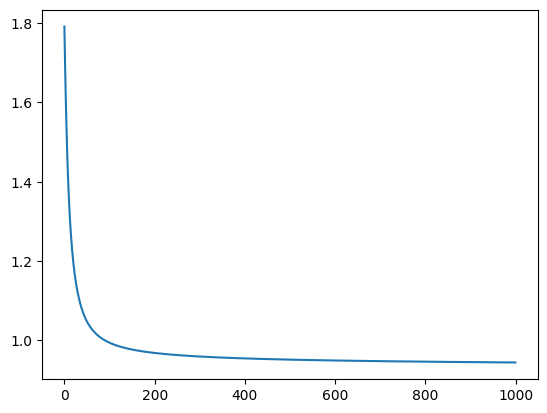

In [9]:
plt.plot(c)